In [1]:
import numpy as np
import os
import pandas as pd
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split


In [2]:
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.layers import activation

In [3]:
file = "/content/drive/MyDrive/cifar-10-batches-py/"

In [4]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [5]:
def load_batch_file(batch_filename):
    filepath = os.path.join(file, batch_filename)
    unpickled = unpickle(filepath)
    return unpickled

In [6]:
train_batch_1 = load_batch_file('data_batch_1')
train_batch_2 = load_batch_file('data_batch_2')
train_batch_3 = load_batch_file('data_batch_3')
train_batch_4 = load_batch_file('data_batch_4')
train_batch_5 = load_batch_file('data_batch_5')
test_batch = load_batch_file('test_batch')

Concatinating all test batch data

In [7]:
num_classes = 10
Total_train_x = np.concatenate([train_batch_1[b'data'], train_batch_2[b'data'], train_batch_3[b'data'], train_batch_4[b'data'], train_batch_5[b'data']])
Total_train_x = Total_train_x.astype('float32') # this is necessary for the division below
Total_train_x /= 255
Total_train_y = np.concatenate([np_utils.to_categorical(labels, num_classes) for labels in [train_batch_1[b'labels'], train_batch_2[b'labels'], train_batch_3[b'labels'], train_batch_4[b'labels'], train_batch_5[b'labels']]])

In [ ]:
Total_train_y.shape

(50000, 10)

In [11]:
x_train,x_val,y_train,y_val=train_test_split(Total_train_x,Total_train_y,test_size=0.2)


In [ ]:
Total_train_x.shape
Total_train_y.shape

(50000, 10)

In [ ]:
x_train.shape
y_train.shape

(40000, 10)

In [ ]:
x_val.shape

(10000, 3072)

In [ ]:

y_val.shape

(10000, 10)

**Test batch data**

In [12]:
test_x = test_batch[b'data'].astype('float32') / 255
test_y = np_utils.to_categorical(test_batch[b'labels'], num_classes)

In [13]:
img_rows = img_cols = 32
channels = 3

## **Neural Network training**

**Technique#1** (Concatanating all data and then splitting to 20-80 for validation & training data)

In [ ]:
simple_model = Sequential()
simple_model.add(Dense(10_000, input_shape=(img_rows*img_cols*channels,), activation='relu'))
simple_model.add(Dense(1_000, activation='relu'))
simple_model.add(Dense(500, activation='relu'))
simple_model.add(Dense(250, activation='relu'))
simple_model.add(Dense(100, activation='relu'))
simple_model.add(Dense(10, activation='softmax'))

simple_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
simple_model_history = simple_model.fit(x_train, y_train, batch_size=50, epochs=15, validation_data=(x_val, y_val))

Epoch 1/15
800/800 [==============================] - 244s 304ms/step - loss: 1.9131 - accuracy: 0.3073 - val_loss: 1.7479 - val_accuracy: 0.3695
Epoch 2/15
800/800 [==============================] - 240s 300ms/step - loss: 1.7040 - accuracy: 0.3921 - val_loss: 1.6306 - val_accuracy: 0.4249
Epoch 3/15
800/800 [==============================] - 239s 299ms/step - loss: 1.6111 - accuracy: 0.4284 - val_loss: 1.5739 - val_accuracy: 0.4307
Epoch 4/15
800/800 [==============================] - 239s 299ms/step - loss: 1.5441 - accuracy: 0.4507 - val_loss: 1.5304 - val_accuracy: 0.4500
Epoch 5/15
800/800 [==============================] - 240s 300ms/step - loss: 1.4895 - accuracy: 0.4710 - val_loss: 1.4963 - val_accuracy: 0.4651
Epoch 6/15
800/800 [==============================] - 240s 300ms/step - loss: 1.4393 - accuracy: 0.4909 - val_loss: 1.4529 - val_accuracy: 0.4881
Epoch 7/15
800/800 [==============================] - 240s 300ms/step - loss: 1.3988 - accuracy: 0.5035 - val_loss: 1.4426 -

In [ ]:
import matplotlib.pyplot as plt
def plot_history(history, title):
    plt.figure(figsize=(10,3))
    # Plot training & validation accuracy values
    plt.subplot(121)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

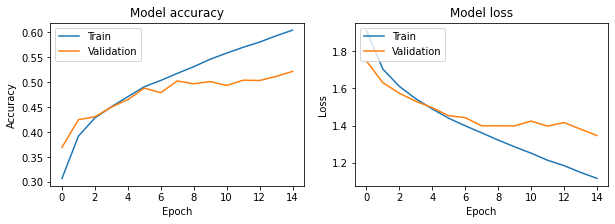

In [ ]:
plot_history(simple_model_history, 'Simple NN with batch size=50 epochs=15 ')

**Evaluating Accuracy through prediction on test data**

In [ ]:
simple_model.evaluate(test_x,test_y)

313/313 [==============================] - 29s 92ms/step - loss: 1.3446 - accuracy: 0.5162


[1.3446089029312134, 0.5162000060081482]

## Time Taken by model to train = **3622 sec** = **60 mins**
## **241 sec** => avg time of each epoch





**TECHNIQUE # 2 (Cross validation)**

In [ ]:
num_classes = 10
Total_train_x = np.concatenate( [train_batch_2[b'data'], train_batch_3[b'data'], train_batch_4[b'data'], train_batch_5[b'data']])
Total_train_x = Total_train_x.astype('float32') # this is necessary for the division below
Total_train_x /= 255
Total_train_y = np.concatenate([np_utils.to_categorical(labels, num_classes) for labels in [ train_batch_2[b'labels'], train_batch_3[b'labels'], train_batch_4[b'labels'], train_batch_5[b'labels']]])

In [ ]:
x_val = np.concatenate([train_batch_1[b'data']])
x_val = x_val.astype('float32')
x_val /= 255 
x_val.shape

y_val = np_utils.to_categorical(train_batch_1[b'labels'], num_classes)
# y_val

In [ ]:
test_x = test_batch[b'data'].astype('float32') / 255
test_y = np_utils.to_categorical(test_batch[b'labels'], num_classes)

In [ ]:
img_rows = img_cols = 32
channels = 3

In [ ]:
Total_train_x.shape


(40000, 3072)

In [ ]:
Total_train_y.shape

(40000, 10)

In [ ]:
simple_model = Sequential()
simple_model.add(Dense(10_000, input_shape=(img_rows*img_cols*channels,), activation='relu'))
simple_model.add(Dense(1_000, activation='relu'))
simple_model.add(Dense(500, activation='relu'))
simple_model.add(Dense(250, activation='relu'))
simple_model.add(Dense(100, activation='relu'))
simple_model.add(Dense(10, activation='softmax'))

simple_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
simple_model_history = simple_model.fit(Total_train_x, Total_train_y, batch_size=50, epochs=15, validation_data=(x_val, y_val))

Epoch 1/15
800/800 [==============================] - 279s 305ms/step - loss: 1.9211 - accuracy: 0.3058 - val_loss: 1.7430 - val_accuracy: 0.3700
Epoch 2/15
800/800 [==============================] - 244s 305ms/step - loss: 1.7016 - accuracy: 0.3945 - val_loss: 1.6564 - val_accuracy: 0.4041
Epoch 3/15
800/800 [==============================] - 243s 304ms/step - loss: 1.6115 - accuracy: 0.4266 - val_loss: 1.6121 - val_accuracy: 0.4164
Epoch 4/15
800/800 [==============================] - 244s 305ms/step - loss: 1.5473 - accuracy: 0.4516 - val_loss: 1.5241 - val_accuracy: 0.4546
Epoch 5/15
800/800 [==============================] - 246s 308ms/step - loss: 1.4936 - accuracy: 0.4678 - val_loss: 1.4884 - val_accuracy: 0.4666
Epoch 6/15
800/800 [==============================] - 247s 309ms/step - loss: 1.4440 - accuracy: 0.4878 - val_loss: 1.4605 - val_accuracy: 0.4795
Epoch 7/15
800/800 [==============================] - 246s 307ms/step - loss: 1.4010 - accuracy: 0.5040 - val_loss: 1.4481 -

In [ ]:
simple_model.predict(test_x)

313/313 [==============================] - 29s 91ms/step


array([[7.4106559e-02, 4.1388761e-02, 7.4662536e-02, ..., 2.7139890e-03,
        1.2088811e-01, 1.2894733e-02],
       [1.2999491e-02, 6.5660290e-02, 2.8404983e-04, ..., 1.2066223e-04,
        2.8086641e-01, 6.3965881e-01],
       [2.8915805e-01, 8.5316204e-02, 1.7148637e-03, ..., 4.9742446e-03,
        4.4786483e-01, 1.6708985e-01],
       ...,
       [2.9521899e-03, 8.2105675e-05, 1.7776006e-01, ..., 5.8499236e-02,
        2.1794096e-02, 3.5011028e-03],
       [1.0118003e-01, 3.4500111e-02, 1.7061195e-01, ..., 2.1921799e-02,
        4.1962188e-02, 3.5615548e-02],
       [5.7914287e-02, 6.6417181e-03, 5.2016180e-02, ..., 5.5094504e-01,
        8.4964018e-03, 3.0101856e-02]], dtype=float32)

In [ ]:
simple_model.evaluate(test_x,test_y)

313/313 [==============================] - 27s 84ms/step - loss: 1.3995 - accuracy: 0.5118


[1.3995152711868286, 0.5117999911308289]

# **Convolution Neural Network**

In [14]:
train_x_reshaped = x_train.reshape(len(x_train), img_rows, img_cols, channels)
val_x_reshaped = x_val.reshape(len(x_val), img_rows, img_cols, channels)
test_x_reshaped = test_x.reshape(len(test_x), img_rows, img_cols, channels)

In [ ]:
from keras.layers import Conv2D, Flatten
simple_cnn_model = Sequential()
#---------------------------------------------------------------------------------------------------------------------s
simple_cnn_model.add(Conv2D(32, (3,3), input_shape=(img_rows,img_cols,channels), activation='relu')) 
simple_cnn_model.add(Conv2D(32, (3,3), activation='relu'))
simple_cnn_model.add(Conv2D(32, (3,3), activation='relu'))
simple_cnn_model.add(Conv2D(32, (3,3), activation='relu'))
simple_cnn_model.add(Conv2D(32, (3,3), activation='relu'))
simple_cnn_model.add(Conv2D(32, (3,3), activation='relu'))

simple_cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
simple_cnn_model.add(Dropout(0.25))
simple_cnn_model.add(Flatten())
 
simple_cnn_model.add(Dense(128, activation='relu'))
simple_cnn_model.add(Dense(10, activation='softmax'))


simple_cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
simple_cnn_model_history = simple_cnn_model.fit(train_x_reshaped, y_train, batch_size=10, epochs=35, validation_data=(val_x_reshaped, y_val))

Epoch 1/35
4000/4000 [==============================] - 365s 91ms/step - loss: 1.6175 - accuracy: 0.4126 - val_loss: 1.3696 - val_accuracy: 0.5122
Epoch 2/35
4000/4000 [==============================] - 350s 88ms/step - loss: 1.3318 - accuracy: 0.5267 - val_loss: 1.3012 - val_accuracy: 0.5397
Epoch 3/35
4000/4000 [==============================] - 349s 87ms/step - loss: 1.1994 - accuracy: 0.5745 - val_loss: 1.2783 - val_accuracy: 0.5509
Epoch 4/35
4000/4000 [==============================] - 349s 87ms/step - loss: 1.1013 - accuracy: 0.6096 - val_loss: 1.1870 - val_accuracy: 0.5830
Epoch 5/35
4000/4000 [==============================] - 348s 87ms/step - loss: 1.0141 - accuracy: 0.6416 - val_loss: 1.1862 - val_accuracy: 0.5863
Epoch 6/35
4000/4000 [==============================] - 348s 87ms/step - loss: 0.9469 - accuracy: 0.6627 - val_loss: 1.2004 - val_accuracy: 0.5845
Epoch 7/35
4000/4000 [==============================] - 348s 87ms/step - loss: 0.8832 - accuracy: 0.6859 - val_loss: 1

In [ ]:
import matplotlib.pyplot as plt
def plot_history(history, title):
    plt.figure(figsize=(10,3))
    # Plot training & validation accuracy values
    plt.subplot(121)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

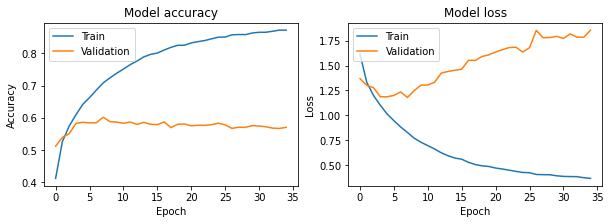

In [ ]:
plot_history(simple_cnn_model_history, 'CNN with batch size=50 epochs=15 ')

In [ ]:
simple_cnn_model.evaluate(test_x_reshaped,test_y)

313/313 [==============================] - 21s 65ms/step - loss: 1.8130 - accuracy: 0.5765


[1.8129781484603882, 0.5764999985694885]

In [24]:
from keras.layers import Conv2D, Flatten
simple_cnn_model = Sequential()
#---------------------------------------------------------------------------------------------------------------------s
simple_cnn_model.add(Conv2D(64, (3,3), input_shape=(img_rows,img_cols,channels), activation='relu')) 
simple_cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

simple_cnn_model.add(Conv2D(32, (3,3), activation='relu'))
simple_cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
# simple_cnn_model.add(Conv2D(32, (3,3), activation='relu'))
# simple_cnn_model.add(Conv2D(32, (3,3), activation='relu'))
# simple_cnn_model.add(Conv2D(32, (3,3), activation='relu'))
# simple_cnn_model.add(Conv2D(32, (3,3), activation='relu'))

# simple_cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
# simple_cnn_model.add(Dropout(0.25))
simple_cnn_model.add(Flatten())

# simple_cnn_model.add(Dense(128, activation='relu'))
simple_cnn_model.add(Dense(64, activation='relu'))
simple_cnn_model.add(Dense(32, activation='relu'))
simple_cnn_model.add(Dense(10, activation='softmax'))


simple_cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
simple_cnn_model_history = simple_cnn_model.fit(train_x_reshaped, y_train, batch_size=100, epochs=50, validation_data=(val_x_reshaped, y_val))

Epoch 1/50
400/400 [==============================] - 71s 176ms/step - loss: 1.8368 - accuracy: 0.3276 - val_loss: 1.5980 - val_accuracy: 0.4303
Epoch 2/50
400/400 [==============================] - 70s 176ms/step - loss: 1.5239 - accuracy: 0.4559 - val_loss: 1.4552 - val_accuracy: 0.4860
Epoch 3/50
400/400 [==============================] - 70s 176ms/step - loss: 1.3909 - accuracy: 0.5070 - val_loss: 1.3439 - val_accuracy: 0.5180
Epoch 4/50
400/400 [==============================] - 70s 175ms/step - loss: 1.3005 - accuracy: 0.5446 - val_loss: 1.3258 - val_accuracy: 0.5359
Epoch 5/50
400/400 [==============================] - 70s 175ms/step - loss: 1.2476 - accuracy: 0.5579 - val_loss: 1.2465 - val_accuracy: 0.5603
Epoch 6/50
400/400 [==============================] - 70s 175ms/step - loss: 1.1961 - accuracy: 0.5813 - val_loss: 1.2184 - val_accuracy: 0.5678
Epoch 7/50
400/400 [==============================] - 70s 176ms/step - loss: 1.1542 - accuracy: 0.5946 - val_loss: 1.2093 - val_ac

In [25]:
simple_cnn_model.evaluate(test_x_reshaped,test_y)

313/313 [==============================] - 5s 16ms/step - loss: 1.5087 - accuracy: 0.5980


[1.508664608001709, 0.5979999899864197]

# **Technique 2**

In [26]:
num_classes = 10
Total_train_x = np.concatenate( [train_batch_2[b'data'], train_batch_3[b'data'], train_batch_4[b'data'], train_batch_5[b'data']])
Total_train_x = Total_train_x.astype('float32') # this is necessary for the division below
Total_train_x /= 255
Total_train_y = np.concatenate([np_utils.to_categorical(labels, num_classes) for labels in [ train_batch_2[b'labels'], train_batch_3[b'labels'], train_batch_4[b'labels'], train_batch_5[b'labels']]])

In [27]:
x_val = np.concatenate([train_batch_1[b'data']])
x_val = x_val.astype('float32')
x_val /= 255 
x_val.shape

y_val = np_utils.to_categorical(train_batch_1[b'labels'], num_classes)
# y_val

In [28]:
test_x = test_batch[b'data'].astype('float32') / 255
test_y = np_utils.to_categorical(test_batch[b'labels'], num_classes)

In [29]:
train_x_reshaped = x_train.reshape(len(x_train), img_rows, img_cols, channels)
val_x_reshaped = x_val.reshape(len(x_val), img_rows, img_cols, channels)
test_x_reshaped = test_x.reshape(len(test_x), img_rows, img_cols, channels)

In [30]:
img_rows = img_cols = 32
channels = 3

In [32]:
from keras.layers import Conv2D, Flatten
simple_cnn_model = Sequential()
#---------------------------------------------------------------------------------------------------------------------s
simple_cnn_model.add(Conv2D(32, (3,3), input_shape=(img_rows,img_cols,channels), activation='relu')) 
simple_cnn_model.add(Conv2D(32, (3,3), activation='relu'))
simple_cnn_model.add(Conv2D(32, (3,3), activation='relu'))
simple_cnn_model.add(Conv2D(32, (3,3), activation='relu'))
simple_cnn_model.add(Conv2D(32, (3,3), activation='relu'))
simple_cnn_model.add(Conv2D(32, (3,3), activation='relu'))

simple_cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
simple_cnn_model.add(Dropout(0.25))
simple_cnn_model.add(Flatten())
 
simple_cnn_model.add(Dense(128, activation='relu'))
simple_cnn_model.add(Dense(10, activation='softmax'))


simple_cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
simple_cnn_model_history = simple_cnn_model.fit(train_x_reshaped, y_train, batch_size=50, epochs=25, validation_data=(val_x_reshaped, y_val))

Epoch 1/25
800/800 [==============================] - 311s 388ms/step - loss: 1.6625 - accuracy: 0.4031 - val_loss: 1.3939 - val_accuracy: 0.4990
Epoch 2/25
800/800 [==============================] - 310s 387ms/step - loss: 1.3578 - accuracy: 0.5167 - val_loss: 1.2131 - val_accuracy: 0.5676
Epoch 3/25
800/800 [==============================] - 302s 377ms/step - loss: 1.2141 - accuracy: 0.5739 - val_loss: 1.0569 - val_accuracy: 0.6334
Epoch 4/25
800/800 [==============================] - 295s 368ms/step - loss: 1.1144 - accuracy: 0.6086 - val_loss: 0.9936 - val_accuracy: 0.6530
Epoch 5/25
800/800 [==============================] - 296s 370ms/step - loss: 1.0267 - accuracy: 0.6380 - val_loss: 0.8924 - val_accuracy: 0.6878
Epoch 6/25
800/800 [==============================] - 297s 371ms/step - loss: 0.9543 - accuracy: 0.6637 - val_loss: 0.8210 - val_accuracy: 0.7155
Epoch 7/25
800/800 [==============================] - 297s 371ms/step - loss: 0.8824 - accuracy: 0.6868 - val_loss: 0.7692 -

In [36]:
simple_cnn_model.evaluate(test_x_reshaped,test_y)


313/313 [==============================] - 19s 61ms/step - loss: 0.4253 - accuracy: 0.8903


[0.425336092710495, 0.8902999758720398]

In [37]:
import matplotlib.pyplot as plt
def plot_history(history, title):
    plt.figure(figsize=(10,3))
    # Plot training & validation accuracy values
    plt.subplot(121)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

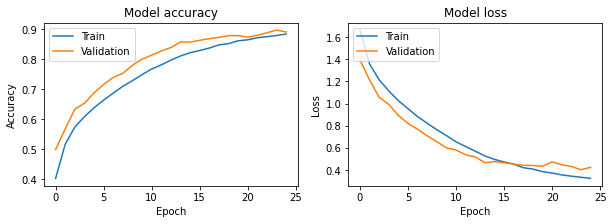

In [38]:
plot_history(simple_cnn_model_history, 'CNN with batch size=50 epochs=15 ')

# **Time Taken** by model to train = 7528 sec = 125 mins
# 301 sec => avg time of each epoch

# **Analysis**

# Hence, it is evidenet that convolution neural network performed well with the CiFAR-10 dataet.

# And in case of time taken CNN took almost double as time taken by ANN to train the model.